In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import os

image_path = "/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(4).jpg"

os.system('xdg-open ' + image_path)


sh: 1: Syntax error: "(" unexpected


512

In [3]:
import subprocess

subprocess.call(['xdg-open', image_path])


Error: no "view" mailcap rules found for type "image/jpeg"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(4).jpg'


3

In [4]:
from PIL import Image
import os

# Function for image preprocessing and overwriting
def preprocess_and_overwrite(image_path):
    # Open the image
    image = Image.open(image_path)

    # Resize the image to a specific size
    target_size = (256, 256)
    resized_image = image.resize(target_size)

    # Convert the image to grayscale
    grayscale_image = resized_image.convert("L")

    # Normalize the pixel values to [0, 1]
    normalized_image = grayscale_image / 255.0

    # Overwrite the original image with the preprocessed image
    normalized_image.save(image_path)

# Specify the paths to the Testing and Training folders
testing_folder = "/kaggle/input/brain-tumor-classification-mri/Testing/"
training_folder = "/kaggle/input/brain-tumor-classification-mri/Training/"

# Preprocess images in the Testing folder
testing_images = os.listdir(testing_folder)
for image_file in testing_images:
    image_path = os.path.join(testing_folder, image_file)
    if os.path.isfile(image_path):  # Skip directories
        preprocess_and_overwrite(image_path)

training_images = os.listdir(training_folder)
for image_file in training_images:
    image_path = os.path.join(training_folder, image_file)
    if os.path.isfile(image_path):  
        preprocess_and_overwrite(image_path)


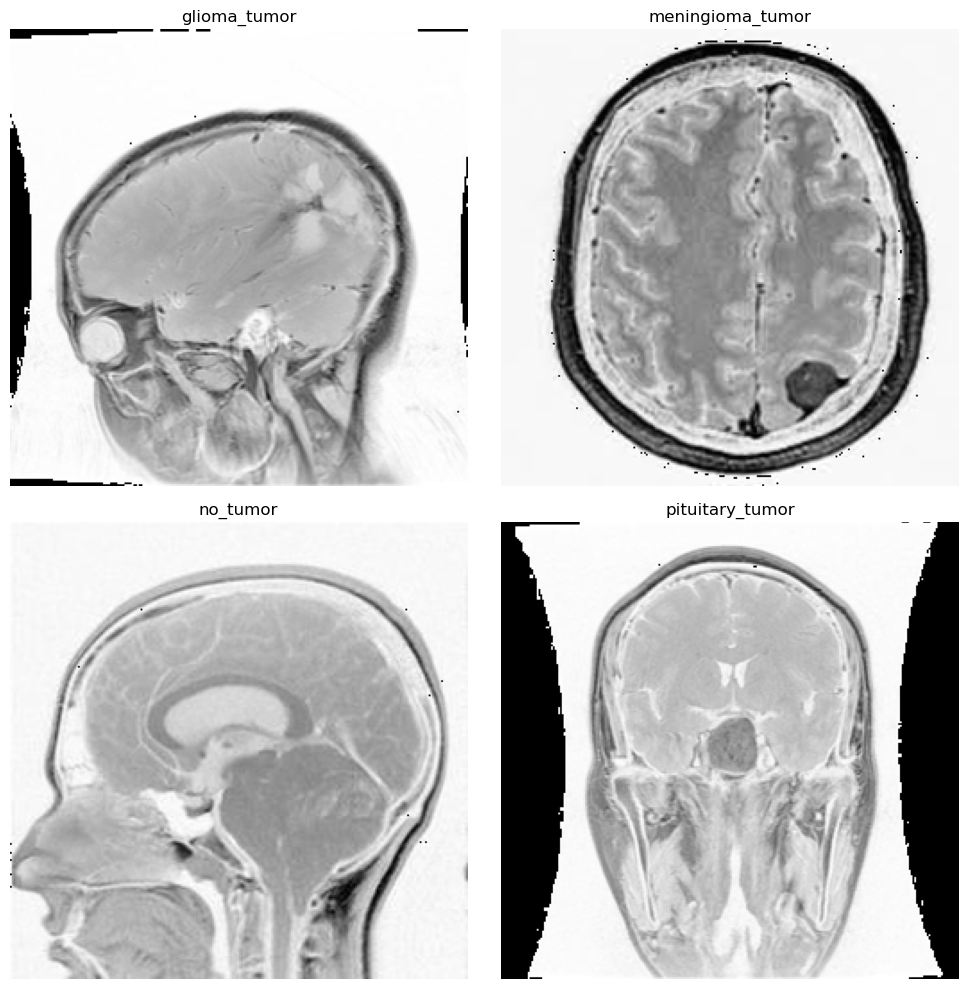

In [5]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Function for image preprocessing and saving in a different directory
def preprocess_and_save(image_path, save_directory):
    # Open the image
    image = Image.open(image_path)

    # Resize the image to a specific size
    target_size = (256, 256)
    resized_image = image.resize(target_size)

    # Convert the image to grayscale
    grayscale_image = resized_image.convert("L")

    # Convert the grayscale image to a NumPy array
    image_array = np.array(grayscale_image)

    # Normalize the pixel values to [0, 255]
    normalized_image_array = (image_array * 255).astype(np.uint8)

    # Convert the normalized array back to an Image object
    normalized_image = Image.fromarray(normalized_image_array)

    # Generate the save path for the preprocessed image
    image_name = os.path.basename(image_path)
    save_path = os.path.join(save_directory, image_name)

    # Save the preprocessed image as JPEG
    normalized_image.save(save_path, "JPEG")

    return normalized_image

# Specify the directory containing the images you want to preprocess
image_directory = "/kaggle/input/brain-tumor-classification-mri/Training"

# Specify the directory to save the preprocessed images
save_directory = "/kaggle/working/preprocessed_images"

# Create the save directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# List of tumor types
tumor_types = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Create subplots for each tumor type
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Preprocess and display the images for each tumor type
for i, tumor_type in enumerate(tumor_types):
    # Specify the folder for the current tumor type
    tumor_folder = os.path.join(image_directory, tumor_type)
    
    # Get the list of image files in the tumor folder
    image_files = os.listdir(tumor_folder)
    
    # Select the first image file for preprocessing and display
    image_path = os.path.join(tumor_folder, image_files[0])
    
    # Preprocess the image and save it
    preprocessed_image = preprocess_and_save(image_path, save_directory)
    
    # Display the preprocessed image in the corresponding subplot
    row = i // 2
    col = i % 2
    axes[row, col].imshow(preprocessed_image, cmap="gray")
    axes[row, col].set_title(tumor_type)
    axes[row, col].axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set the paths for the training and testing directories
train_dir = "/kaggle/input/brain-tumor-classification-mri/Training"
test_dir = "/kaggle/input/brain-tumor-classification-mri/Testing"

# Set the image dimensions and batch size
image_size = (256, 256)
batch_size = 32

# Create an instance of the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

# Load and augment the training data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode="categorical")

# Create an instance of the ImageDataGenerator for rescaling the testing data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load the testing data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical")

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/10
89/89 [==============================] - 258s 3s/step - loss: 1.2411 - accuracy: 0.4383 - val_loss: 2.0390 - val_accuracy: 0.3073
Epoch 2/10
89/89 [==============================] - 256s 3s/step - loss: 0.9884 - accuracy: 0.5620 - val_loss: 3.1920 - val_accuracy: 0.3177
Epoch 3/10
89/89 [==============================] - 256s 3s/step - loss: 0.8893 - accuracy: 0.6099 - val_loss: 2.9131 - val_accuracy: 0.3594
Epoch 4/10
89/89 [==============================] - 256s 3s/step - loss: 0.8064 - accuracy: 0.6392 - val_loss: 3.0340 - val_accuracy: 0.3568
Epoch 5/10
89/89 [==============================] - 258s 3s/step - loss: 0.7573 - accuracy: 0.6804 - val_loss: 2.1657 - val_accuracy: 0.3984
Epoch 6/10
89/89 [==============================] - 257s 3s/step - loss: 0.7312 - accuracy: 0.6882 - val_loss: 3.0123 - val_accuracy: 0.3880
Epoch 7/10
89/89 [==============================] - 255s 3s/step - loss

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set the paths for the training and testing directories
train_dir = "/kaggle/input/brain-tumor-classification-mri/Training"
test_dir = "/kaggle/input/brain-tumor-classification-mri/Testing"

# Set the image dimensions and batch size
image_size = (256, 256)
batch_size = 32

# Create an instance of the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

# Load and augment the training data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode="categorical")

# Create an instance of the ImageDataGenerator for rescaling the testing data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load the testing data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical")

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust the learning rate
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=40,  # Increase the number of epochs
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/40
89/89 [==============================] - 260s 3s/step - loss: 1.2554 - accuracy: 0.4362 - val_loss: 1.7140 - val_accuracy: 0.2448
Epoch 2/40
89/89 [==============================] - 260s 3s/step - loss: 1.1135 - accuracy: 0.5222 - val_loss: 1.6551 - val_accuracy: 0.3620
Epoch 3/40
89/89 [==============================] - 261s 3s/step - loss: 0.9904 - accuracy: 0.5884 - val_loss: 1.8120 - val_accuracy: 0.4479
Epoch 4/40
89/89 [==============================] - 259s 3s/step - loss: 0.9013 - accuracy: 0.6187 - val_loss: 1.7462 - val_accuracy: 0.4583
Epoch 5/40
89/89 [==============================] - 262s 3s/step - loss: 0.8373 - accuracy: 0.6427 - val_loss: 2.1480 - val_accuracy: 0.4271
Epoch 6/40
89/89 [==============================] - 262s 3s/step - loss: 0.7967 - accuracy: 0.6635 - val_loss: 2.2349 - val_accuracy: 0.3932
Epoch 7/40
89/89 [==============================] - 261s 3s/step - loss